**Boston Dataset**

#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col = 0)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
boston_df.shape

(506, 13)

In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


Descriptive Statistics and Visualisations

In [7]:
boston_df["AGE"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [8]:
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<Axes: title={'center': 'Median value of owner-occupied homes'}, ylabel='MEDV'>

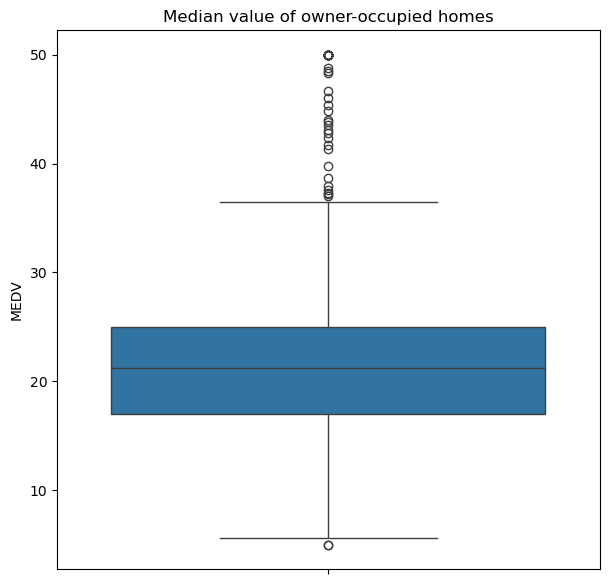

In [10]:
pyplot.figure(figsize = (7,7)) 
pyplot.title("Median value of owner-occupied homes")
sns.boxplot(y = boston_df["MEDV"])

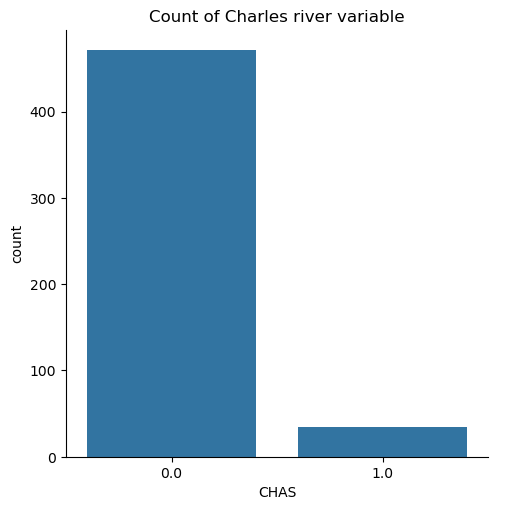

In [11]:
ax = sns.catplot(x = "CHAS", kind ="count", data = boston_df)
ax.set(xlabel='CHAS', ylabel='count', title = "Count of Charles river variable")

In [12]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

<Axes: title={'center': 'MEDV variable vs the AGE variable'}, xlabel='MEDV', ylabel='AGE_GROUP'>

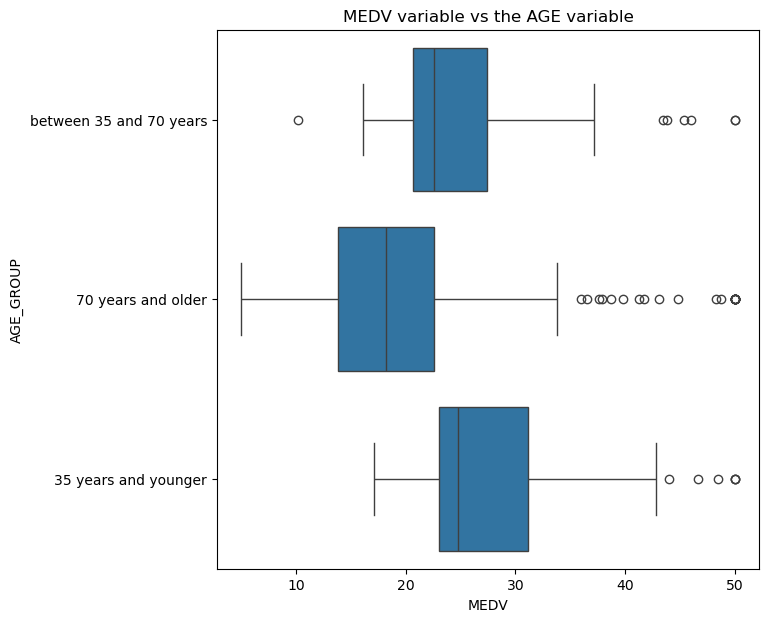

In [14]:
#Provide a boxplot for the MEDV variable vs the AGE variable
pyplot.figure(figsize=(7,7))
pyplot.title("MEDV variable vs the AGE variable")
sns.boxplot(x= "MEDV", y= "AGE_GROUP", data = boston_df)

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

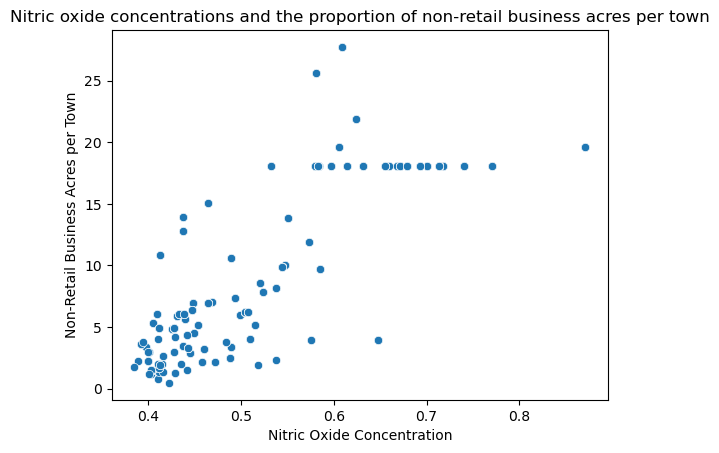

In [15]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

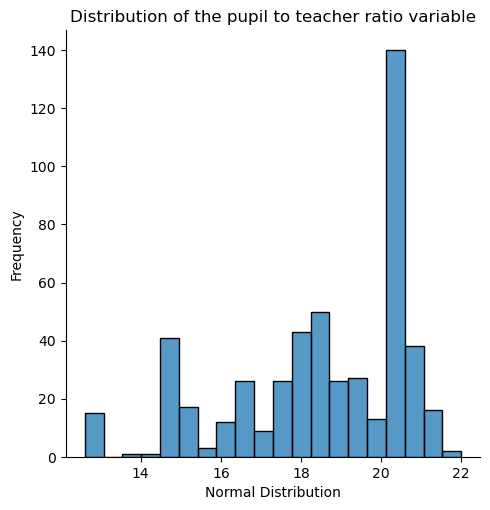

In [17]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(x = boston_df["PTRATIO"], bins = 20, kde = False)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title = "Distribution of the pupil to teacher ratio variable")

State the Hypothesis

In [18]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'

C:\Users\Aayush Bhuyan\AppData\Local\Temp\ipykernel_26148\3410722175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = boston_df["MEDV"], bins = 20, kde = True)


[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of dependent variable (MEDV)')]

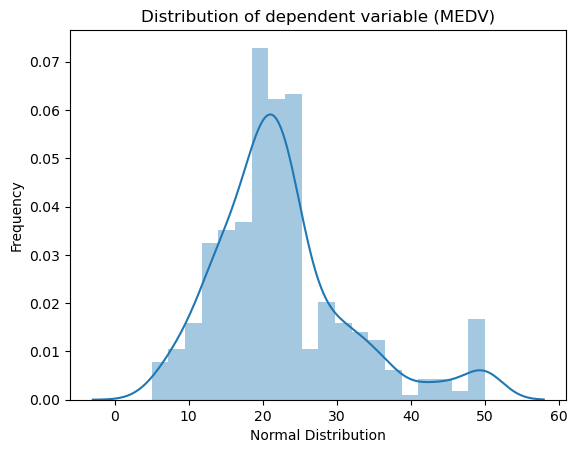

In [19]:
# We can plot the dependent variable with a historgram
ax = sns.distplot(x = boston_df["MEDV"], bins = 20, kde = True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title='Distribution of dependent variable (MEDV)')

Levene's test

In [20]:
scipy.stats.levene(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], center = "mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [21]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [22]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

In [23]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

The p value is greater than alpha i.e. 0.06>0.05. So, we fail to reject the null hypothesis i.e. Eqaulity of variance

In [24]:
thirtyfive_lower   = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older      = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [25]:
# One way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Result:
The p-value is less than alpha (0.05) So, we need to reject the null hypothesis. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

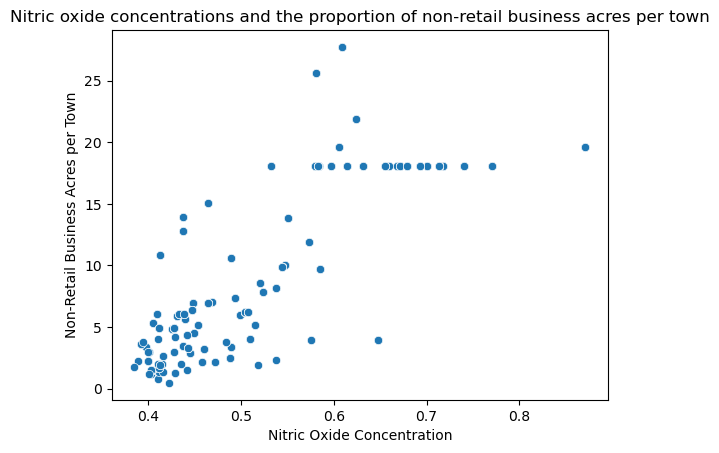

In [26]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

In [27]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

Result:
Since the p-value is less than alpha(0.05). We need to reject the null hypothesis. i.e. There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Note:
No, we can't conclude there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [28]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        17:47:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result:
Since the p-value is less than alpha(0.05), we reject the null hypothesis. i.e. Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.

Note:
The coefficient 1.0916 means that for MEDV increases by 1.0916 times for every 1 weighted distances to five Boston employment centres